In [125]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read Data
data = pd.read_csv('ex2data2.txt', header=None)
data.columns = ['Exam1', 'Exam2', 'Result']

In [3]:
#Data Summary
data.head()

,Exam1,Exam2,Result
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [4]:
#We use this function to create new column
def label_result(data):
    if data['Result'] == 1:
        return 'Admitted'
    else:
        return 'Not Admitted'

In [5]:
#The column created for visualization
data['Result_Name'] = data.apply (lambda data: label_result(data),axis=1)

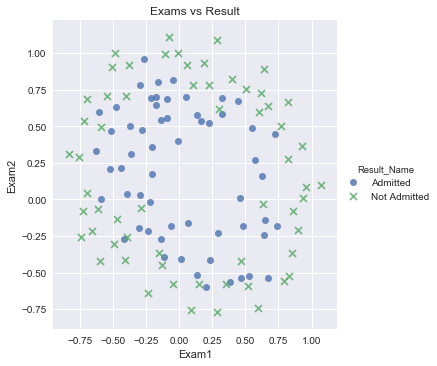

In [6]:
#plotting House Size vs Price
sns.lmplot(x='Exam1', y='Exam2', hue='Result_Name',data=data, fit_reg=False, markers=["o", "x"])
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.title('Exams vs Result')

In [46]:
#Create X Matrix
X = data[['Exam1','Exam2']].values
X.shape

(118, 2)

In [8]:
#Create Y Matrix
Y = data['Result'].reshape(-1,1)
Y.shape

(118, 1)

In [10]:
#Define sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [19]:
#Feature Mapping Function 
from sklearn.preprocessing import PolynomialFeatures as PF
poly = PF(6)
X_featured = poly.fit_transform(X)

In [20]:
#Featured X shape
X_featured.shape

(118, 28)

In [47]:
#İnitialize Theta
theta = np.zeros((X_featured.shape[1]))
theta = theta[:,np.newaxis]
theta.shape

(28, 1)

In [71]:
#Defining Cost function
def costfunction(theta,X,Y,lmbda):
    J = 0;
    theta = theta.reshape(-1,1)
    m = Y.size
    h = sigmoid( np.dot(X, theta) )
    J = (1 / m) * np.sum( (np.dot(-Y.T , np.log(h))) - (np.dot((1 - Y).T , np.log(1 - h))) ) +  ( ( lmbda / (2 * m) ) * sum(np.power(theta,2)) )
    grad = (1 / m) * np.dot(X.T , (h - Y)) + ( (lmbda / m) * theta )
    return J,grad

In [49]:
#Assign Lambda
lmbda = 1

In [54]:
#calculate Cost and Gradient
J_1,grad_1 = costfunction(theta,X_featured,Y,lmbda)

In [55]:
#Check cost Value
J_1

array([ 0.69314718])

In [57]:
#check first 5 Grad Values
grad_1[:5]

array([[  8.47457627e-03],
       [  1.87880932e-02],
       [  7.77711864e-05],
       [  5.03446395e-02],
       [  1.15013308e-02]])

In [59]:
#Define new test theta
test_theta = np.ones((X_featured.shape[1],1));
test_theta.shape

(28, 1)

In [62]:
#Assign new Lambda
lmbda_1 = 10

In [65]:
#calculate Cost and Gradient
J_2,grad_2 = costfunction(test_theta,X_featured,Y,lmbda_1)

In [66]:
#Check cost Value
J_2

array([ 3.20688221])

In [67]:
#check first 5 Grad Values
grad_2[:5]

array([[ 0.43079084],
       [ 0.16135192],
       [ 0.19479576],
       [ 0.22686278],
       [ 0.09218568]])

In [69]:
#import library
import scipy.optimize as opt

In [74]:
#optimized theta calculation
theta_optimized = opt.fmin_tnc(func=costfunction, x0=theta, args=(X_featured, Y, lmbda))[0]

In [75]:
#Check theta value
theta_optimized

array([ 1.14201564,  0.60123715,  1.16715813, -1.87180902, -0.91567129,
       -1.26944017,  0.12678673, -0.36850107, -0.34494253, -0.17391074,
       -1.4237067 , -0.04838578, -0.60631733, -0.26916588, -1.16320193,
       -0.24269706, -0.20697486, -0.04305268, -0.28008546, -0.28708931,
       -0.46912456, -1.03629766,  0.0290438 , -0.2925073 ,  0.01716377,
       -0.32880516, -0.13795624, -0.93187566])

In [76]:
#Prediction Function
def predict(theta,X):
    prob = sigmoid( np.dot(X, theta) )
    res = np.zeros(prob.size)
    for i in range(prob.size):
        if prob[i] >= 0.5:
            res[i] = int(1)
        else:
            res[i] = int(0)
    return res.astype('int64')

In [78]:
#Make prediction with the optimized theta values
res = predict(theta_optimized,X_featured)

In [79]:
#Check the accuracy of the model
res = res == Y.T[0:,]

In [80]:
print('accuracy = {}'.format((sum(res[0])/res[0].size)*100))

accuracy = 81.35593220338984


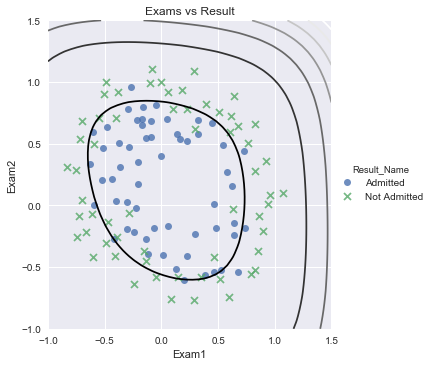

In [130]:
#Decision Boundry plot
u = np.linspace(-1, 1.5, 50);
v = np.linspace(-1, 1.5, 50);
z = np.zeros( (len(u), len(v)) );
for i in range(0,len(u)):
    for j in range(0,len(v)):
        z[i][j] = np.dot(poly.fit_transform([u[i],v[j]]), theta_optimized)
z = np.transpose(z)

sns.lmplot(x='Exam1', y='Exam2', hue='Result_Name',data=data, fit_reg=False, markers=["o", "x"])
plt.contour(u, v, z)
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.title('Exams vs Result')

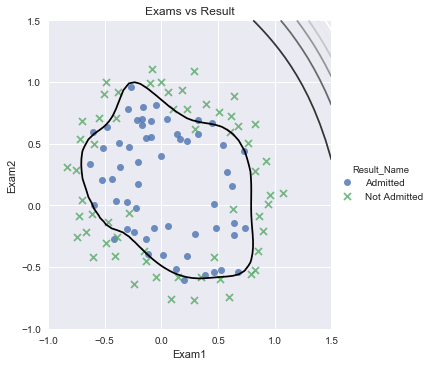

In [132]:
#Try with 0 lambda
lmbda_2 = 0;
#optimized theta calculation
theta_optimized_1 = opt.fmin_tnc(func=costfunction, x0=theta, args=(X_featured, Y, lmbda_2))[0]
#Decision Boundry plot
u = np.linspace(-1, 1.5, 50);
v = np.linspace(-1, 1.5, 50);
z = np.zeros( (len(u), len(v)) );
for i in range(0,len(u)):
    for j in range(0,len(v)):
        z[i][j] = np.dot(poly.fit_transform([u[i],v[j]]), theta_optimized_1)
z = np.transpose(z)

sns.lmplot(x='Exam1', y='Exam2', hue='Result_Name',data=data, fit_reg=False, markers=["o", "x"])
plt.contour(u, v, z)
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.title('Exams vs Result')

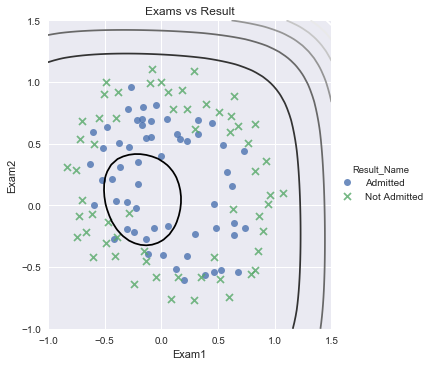

In [152]:
#Try with 100 lambda
lmbda_2 = 100;
#optimized theta calculation
theta_optimized_1 = opt.fmin_tnc(func=costfunction, x0=theta, args=(X_featured, Y, lmbda_2))[0]
#Decision Boundry plot
u = np.linspace(-1, 1.5, 50);
v = np.linspace(-1, 1.5, 50);
z = np.zeros( (len(u), len(v)) );
for i in range(0,len(u)):
    for j in range(0,len(v)):
        z[i][j] = np.dot(poly.fit_transform([u[i],v[j]]), theta_optimized_1)
z = np.transpose(z)
sns.lmplot(x='Exam1', y='Exam2', hue='Result_Name',data=data, fit_reg=False, markers=["o", "x"])
plt.contour(u, v, z)
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.title('Exams vs Result')